<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Ecuacion_de_la_Onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*ECUACION DE ONDA*
$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

Ejemplo 1:

$$
f(x) = \begin{cases}
\frac{2K}{L}x, & 0 \leq x \leq \frac{L}{2} \\
\frac{2K}{L}(L - x), & \frac{L}{2} < x \leq L
\end{cases}
$$

con
$$
k,c=1
$$

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, pi, integrate, lambdify

# Parametros
L, K, c = 1, 1, 1
x, n = symbols('x n')

# Funcion en dos
f1 = (2*K/L)*x
f2 = (2*K/L)*(L - x)

Formula serie de Fourier que se uso
$$
b_n = \frac{2}{L} \left[
\int_0^{L/2} \frac{2K}{L}x \sin\left(\frac{n \pi x}{L}\right) dx +
\int_{L/2}^{L} \frac{2K}{L}(L - x) \sin\left(\frac{n \pi x}{L}\right) dx
\right]
$$

In [114]:

# Coeficiente de Fourier bn
def bn(n_val):
    b1 = integrate(f1*sin(n_val*pi*x/L), (x, 0, L/2))
    b2 = integrate(f2*sin(n_val*pi*x/L), (x, L/2, L))
    return (2/L)*(b1 + b2)

In [115]:
# Dominio de mi grafica
x_vals = np.linspace(0, L, 500)
t_fixed = 0.15  # Tiempo fijo

$$
f(x) = \begin{cases}
\frac{2K}{L}x, & 0 \leq x \leq \frac{L}{2} \\
\frac{2K}{L}(L - x), & \frac{L}{2} < x \leq L
\end{cases}
$$

In [116]:
# Funcion f(x)
f_original = np.piecewise(x_vals,
                          [x_vals <= L/2, x_vals > L/2],
                          [lambda x: (2*K/L)*x, lambda x: (2*K/L)*(L - x)])

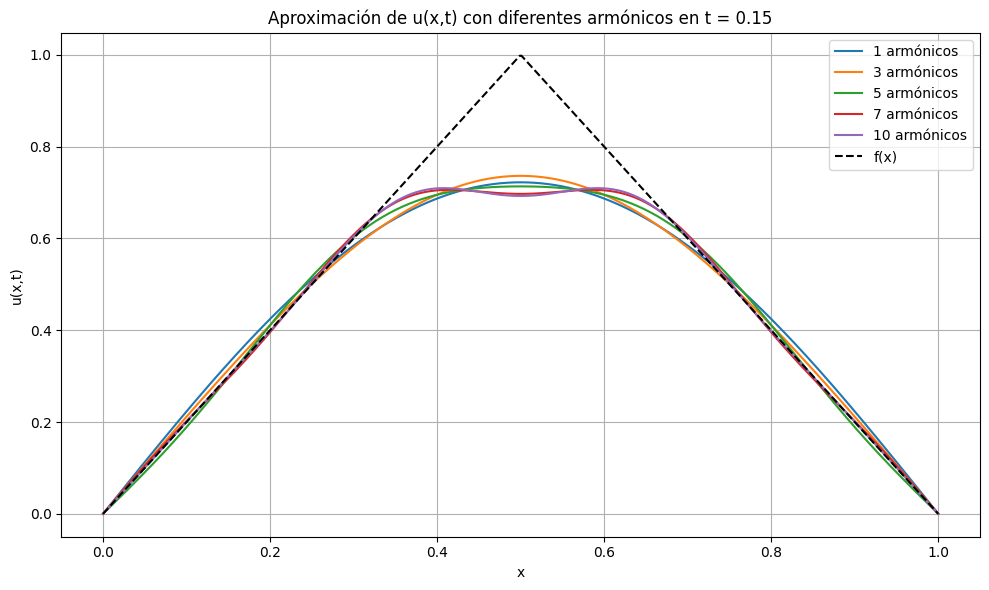

In [117]:
# Graficar aproximaciones con 10 armonicos
plt.figure(figsize=(10, 6))
for n_terms in [1, 3, 5, 7, 10]:
    u = np.zeros_like(x_vals)
    for i in range(1, n_terms + 1):
        bni = lambdify(x, bn(i), 'numpy')(x_vals)
        u += bni * np.sin(i * np.pi * x_vals / L) * np.cos(i * np.pi * c * t_fixed / L)
    plt.plot(x_vals, u, label=f'{n_terms} armónicos')


plt.plot(x_vals, f_original, '--', color='black', label='f(x)')


plt.title('Aproximación de u(x,t) con diferentes armónicos en t = 0.15')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

***Repetimos el mismo proceso pero ahora para observar t en 3D:***

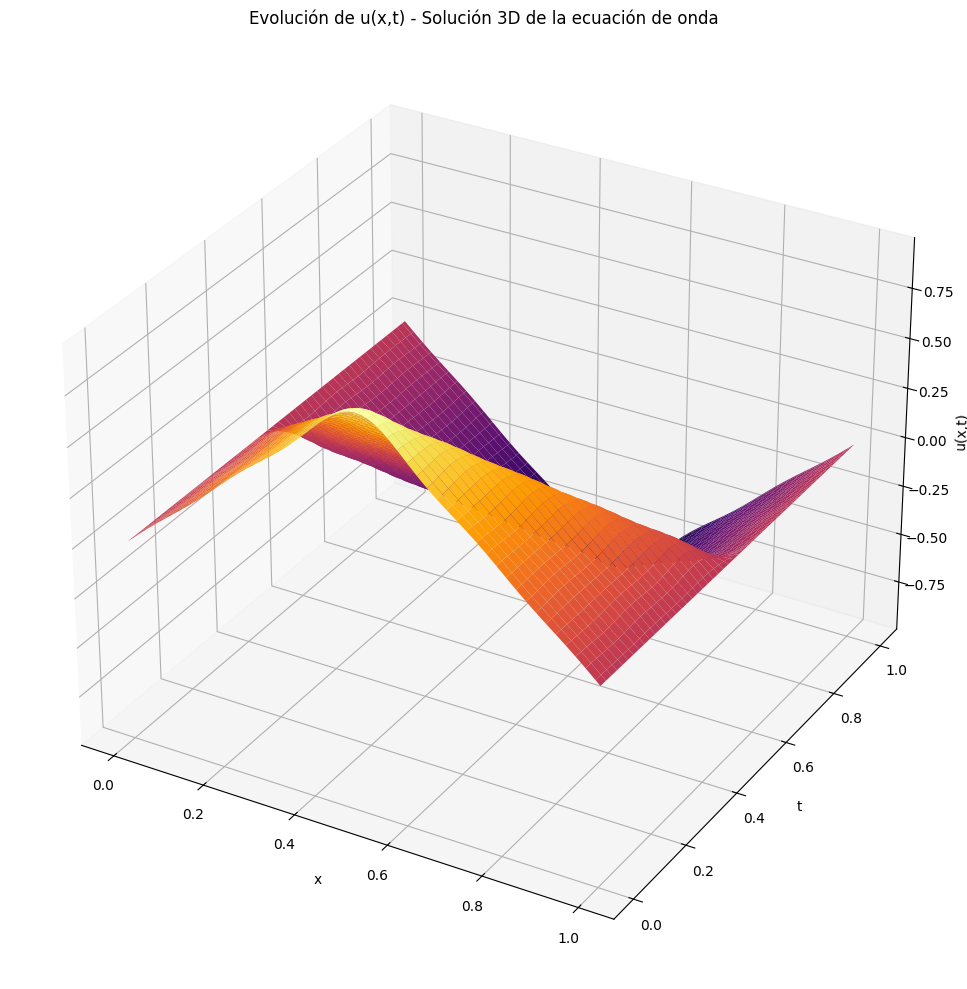

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, pi, integrate
from mpl_toolkits.mplot3d import Axes3D


L, K, c = 1, 1, 1
x_sym = symbols('x')


f1 = (2*K/L)*x_sym
f2 = (2*K/L)*(L - x_sym)

def bn(n_val):
    b1 = integrate(f1*sin(n_val*pi*x_sym/L), (x_sym, 0, L/2))
    b2 = integrate(f2*sin(n_val*pi*x_sym/L), (x_sym, L/2, L))
    return (2/L)*(b1 + b2)


x = np.linspace(0, 1.0, 100)
t = np.linspace(0, 1.0, 100)
X, T = np.meshgrid(x, t)

U = np.zeros_like(X)
for i in range(1, 11):
    bn_i = float(bn(i))
    U += bn_i * np.sin(i * np.pi * X / L) * np.cos(i * np.pi * c * T / L)

#  3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, T, U, cmap="inferno")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Evolución de u(x,t) - Solucion 3D de la ecuación de onda')
plt.tight_layout()
plt.show()